# EasyVisa Project

## Context:

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

## Objective:

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired your firm EasyVisa for data-driven solutions. You as a data scientist have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status. 


## Data Description

The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No 
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment. 
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Importing necessary libraries and data

In [96]:
# this will help in making the Python code more structured automatically (good coding practice)
%reload_ext nb_black

import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)


# Libraries different ensemble classifiers
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    StackingClassifier,
)

from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

# Libraries to get different metric scores
from sklearn import metrics
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    roc_auc_score,
    roc_curve,
    precision_score,
    confusion_matrix,
    plot_confusion_matrix,
    precision_recall_curve,
    make_scorer,
)


# To tune different models
from sklearn.model_selection import GridSearchCV

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [2]:
# loading the dataset
easyvisa = pd.read_csv("EasyVisa.csv")

<IPython.core.display.Javascript object>

## Data Overview

- Observations
- Sanity checks

In [3]:
# checking the shape of the data
print(
    f"There are {easyvisa.shape[0]} rows and {easyvisa.shape[1]} columns."
)  # f-string

There are 25480 rows and 12 columns.


<IPython.core.display.Javascript object>

In [4]:
# To view a sample of the data
easyvisa.sample(
    20, random_state=1
)  # setting the random_state ensures we get the same results every time

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
17639,EZYV17640,Asia,Bachelor's,Y,N,567,1992,Midwest,26842.9100,Year,Y,Certified
23951,EZYV23952,Oceania,Bachelor's,N,N,619,1938,Midwest,66419.9800,Year,Y,Certified
8625,EZYV8626,Asia,Master's,N,N,2635,2005,South,887.2921,Hour,Y,Certified
20206,EZYV20207,Asia,Bachelor's,Y,Y,3184,1986,Northeast,49435.8000,Year,Y,Certified
7471,EZYV7472,Europe,Bachelor's,Y,N,4681,1928,West,49865.1900,Year,Y,Denied
3433,EZYV3434,Asia,Bachelor's,Y,N,222,1989,South,813.7261,Hour,Y,Certified
24440,EZYV24441,Europe,High School,N,Y,3278,1994,South,204948.3900,Year,Y,Denied
12104,EZYV12105,Asia,Master's,Y,N,1359,1997,West,202237.0400,Year,N,Certified
15656,EZYV15657,Asia,Bachelor's,N,N,2081,2003,West,111713.0200,Year,Y,Denied
23110,EZYV23111,North America,Bachelor's,Y,N,854,1998,Northeast,444.8257,Hour,Y,Denied


<IPython.core.display.Javascript object>

#### Observations
A quick glance at the above sample data suggests below patterns 
- There seem to be more applications from Asia than other continents. 
- Most of the applicants have Bachelor's and Master's degree.
- Most of the applicants have job experience and do not require training. 
- no_of_employees, yr_of_estab and prevailing_wage data has a wide range.
- There are more applications for positions in West and Midwest, which probably indicates more skill shortage in the region.
- Most of the applications are for full time positions where the prevailing wage is Yearly. 

In [5]:
# checking column datatypes and number of non-null values
easyvisa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


<IPython.core.display.Javascript object>

#### Observations
no_of_employees, yr_of_estab, prevailing_wage are numeric (int64 or float64). All other columns in the dataset are object type. 

In [6]:
# creating a copy of the data so that original data remains unchanged
df = easyvisa.copy()

<IPython.core.display.Javascript object>

In [7]:
# view top 5 rows of the data
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


<IPython.core.display.Javascript object>

In [9]:
# view last 5 rows of the data
df.tail()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91,Year,Y,Certified


<IPython.core.display.Javascript object>

In [10]:
# checking missing values in the data
df.isnull().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

<IPython.core.display.Javascript object>

#### Observations
There are no missing values in the dataset.

In [11]:
# checking for duplicate values in the data
df.duplicated().sum()

0

<IPython.core.display.Javascript object>

#### Observations
There are no duplicate values in the dataset.

In [12]:
# Let's drop case_id since it's a unique identifier and would have no impact on the prediction capability of the model, or in data analysis

df.drop("case_id", axis=1, inplace=True)


<IPython.core.display.Javascript object>

In [13]:
# Check the dataset after dropping the column
df.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


<IPython.core.display.Javascript object>

In [14]:
# Lets convert the columns with an 'object' datatype into categorical variables
for column in df.columns:  # Loop through all columns in the dataframe
    if df[column].dtype == "object":  # Only apply for columns with type object
        df[column] = df[column].astype("category")  # convert to category
df.head(10)

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
5,Asia,Master's,Y,N,2339,2012,South,78252.1400,Year,Y,Certified
6,Asia,Bachelor's,N,N,4985,1994,South,53635.3900,Year,Y,Certified
7,North America,Bachelor's,Y,N,3035,1924,West,418.2298,Hour,Y,Denied
8,Asia,Bachelor's,N,N,4810,2012,Midwest,74362.1900,Year,Y,Certified
9,Europe,Doctorate,Y,N,2251,1995,South,67514.7600,Year,Y,Certified


<IPython.core.display.Javascript object>

In [19]:
# checking column datatypes after converting object columns to Category
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   continent              25480 non-null  category
 1   education_of_employee  25480 non-null  category
 2   has_job_experience     25480 non-null  category
 3   requires_job_training  25480 non-null  category
 4   no_of_employees        25480 non-null  int64   
 5   yr_of_estab            25480 non-null  int64   
 6   region_of_employment   25480 non-null  category
 7   prevailing_wage        25480 non-null  float64 
 8   unit_of_wage           25480 non-null  category
 9   full_time_position     25480 non-null  category
 10  case_status            25480 non-null  category
dtypes: category(8), float64(1), int64(2)
memory usage: 797.7 KB


<IPython.core.display.Javascript object>

Object columns have been successfully converted to category

In [20]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
continent,25480,6,Asia,16861,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education_of_employee,25480,4,Bachelor's,10234,NaN,NaN,NaN,NaN,NaN,NaN,NaN
has_job_experience,25480,2,Y,14802,NaN,NaN,NaN,NaN,NaN,NaN,NaN
requires_job_training,25480,2,N,22525,NaN,NaN,NaN,NaN,NaN,NaN,NaN
no_of_employees,25480.0,NaN,NaN,NaN,5667.04321,22877.928848,-26.0,1022.0,2109.0,3504.0,602069.0
yr_of_estab,25480.0,NaN,NaN,NaN,1979.409929,42.366929,1800.0,1976.0,1997.0,2005.0,2016.0
region_of_employment,25480,5,Northeast,7195,NaN,NaN,NaN,NaN,NaN,NaN,NaN
prevailing_wage,25480.0,NaN,NaN,NaN,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27
unit_of_wage,25480,4,Year,22962,NaN,NaN,NaN,NaN,NaN,NaN,NaN
full_time_position,25480,2,Y,22773,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<IPython.core.display.Javascript object>

#### Observations
- Asia is the most frequently occuring continent in the dataset, i.e. there are more applications from Asia than other continents. 
- Most of the applicants have Bachelor's degree.
- Most of the applicants have job experience and do not require training. 
- no_of_employees data has a wide range and looks right skewed. Min value indicates that there are rows with negative values. 
- yr_of_estab data has a narrow range and appears to have a left skewed distribution. 
- prevailing_wage data has a wide range and looks heavily right skewed. Min and Max values indicates there could be outliers in the data. 
- There are more applications for positions in Northeast, which probably indicates more skill shortage in the region.
- Most of the applications are for full time positions where the unit of wage is in Year. 
- There are more Certified applications than Denied. 

**Fix negative values in `no_of_employees` column** 

In [22]:
# Check records with negative value for no_of_employees
df[df["no_of_employees"] <= 0].shape

(33, 11)

<IPython.core.display.Javascript object>

In [23]:
# Changing the negative values to positive
df["no_of_employees"] = abs(df["no_of_employees"])

<IPython.core.display.Javascript object>

In [24]:
# Check records with negative value for no_of_employees after conversion
df[df["no_of_employees"] <= 0].shape

(0, 11)

<IPython.core.display.Javascript object>

In [25]:
df.shape

(25480, 11)

<IPython.core.display.Javascript object>

**Check % distribution of each unique category in each of the categorical variables** 

In [32]:
# Print % distribution of each unique category in each of the categorical variables
for column in df.columns:  # Loop through all columns in the dataframe
    if df[column].dtype.name == "category":  # Only apply for columns with type category
        print(
            df[column].value_counts(normalize=True).mul(100).round(1).astype(str) + "%"
        )
        print("-" * 50)

Asia             66.2%
Europe           14.6%
North America    12.9%
South America     3.3%
Africa            2.2%
Oceania           0.8%
Name: continent, dtype: object
--------------------------------------------------
Bachelor's     40.2%
Master's       37.8%
High School    13.4%
Doctorate       8.6%
Name: education_of_employee, dtype: object
--------------------------------------------------
Y    58.1%
N    41.9%
Name: has_job_experience, dtype: object
--------------------------------------------------
N    88.4%
Y    11.6%
Name: requires_job_training, dtype: object
--------------------------------------------------
Northeast    28.2%
South        27.5%
West         25.8%
Midwest      16.9%
Island        1.5%
Name: region_of_employment, dtype: object
--------------------------------------------------
Year     90.1%
Hour      8.5%
Week      1.1%
Month     0.3%
Name: unit_of_wage, dtype: object
--------------------------------------------------
Y    89.4%
N    10.6%
Name: full_time_po

<IPython.core.display.Javascript object>

#### Observations
- 66% cases are `Certified` for Visa
- 90% positions are `full_time_position`

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

## Univariate Analysis

In [33]:
# Function to plot distribution plot and box plot as subplots in one row.
# This will be a resuable for univariate analysis of different variables of df dataframe


def distribution_box_plot(
    data, series, kde=False, mean=False, median=False, mode=False
):
    """
    Distplot and boxplot as subplots for a series within a dataframe
    data =  Dataframe
    series = column / variable under analysis
    kde =  Boolean. To show Kernel Density Estimate curve. Default set to False
    mean =  Boolean. To show mean value of a numeric series. Default set to False
    median = Boolean. To show median of a numeric series. Default set to False
    mode = Boolean. To show first mode value of a numeric series. Default set to False
    """
    plt.figure(figsize=(20, 5))
    plt.subplot(
        1, 2, 1
    )  # Divides the plot area into subplots with 1 row and 2 columns. 3rd arg indicates plot index
    sns.distplot(data[series], kde=kde)  # Add distribution plot
    if mean == True:  # Add mean indicator to the distplot
        plt.axvline(data[series].mean(), color="r", linestyle="--", label="Mean")
    if median == True:  # Add median indicator to the distplot
        plt.axvline(data[series].median(), color="g", linestyle="-", label="Median")
    if mode == True:  # Add first modal value indicator to the distplot
        plt.axvline(data[series].mode()[0], color="b", linestyle="-", label="Mode")

    plt.legend()  # Show legends

    plt.subplot(1, 2, 2)
    sns.boxplot(
        data=data, y=series, showmeans=True
    )  # Add box plot with mean value indicator
    plt.show()

<IPython.core.display.Javascript object>

In [34]:
# Function to plot labelled countplot with percentage and count over the bars
# This will be a resuable for univariate analysis of different variables / columns within df dataframe


def labelled_countplot(data, series, showper=True, showcount=True, n=None):
    """
    data = Dataframe
    series = column / variable under analysis
    showper = Boolean. To show percentage over the bars.Default set to True
    showcount = Boolean. To show count over the bars.Default set to True
    n = number of top records to plot
    """
    count = data[series].nunique()  # get the number of unique values of the column
    if n is None:
        plt.figure(
            figsize=(count + 3.5, 7)
        )  # Adjust the width of the graph area as per the unique values
    else:
        plt.figure(
            figsize=(n + 5, 5)
        )  # Adjust the width of the graph area as per the n value specified

    # Show countplot of the data in descending order of value count
    ax = sns.countplot(
        x=data[series], order=data[series].value_counts(ascending=False).index[:n]
    )

    # If True, show count as data label over each bar
    if showcount == True:
        for p, label in zip(
            ax.patches, data[series].value_counts(ascending=False).values
        ):
            ax.annotate(label, (p.get_x() + 0.100, p.get_height() + 3.5))

    # If True, show percentage as data label over each bar
    if showper == True:
        total = data[series].count()
        for p, label in zip(
            ax.patches, 100 * data[series].value_counts(ascending=False).values / total
        ):
            ax.annotate(
                "({:.2f}%)".format(label), (p.get_x() + 0.350, p.get_height() + 3.5)
            )

    plt.show()

<IPython.core.display.Javascript object>

**`Numerical Variables`**

**`no_of_employees`**

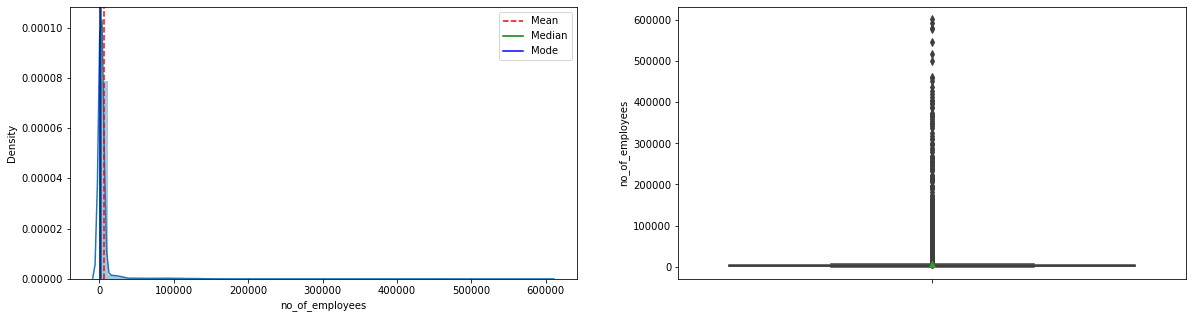

<IPython.core.display.Javascript object>

In [35]:
distribution_box_plot(
    df, "no_of_employees", kde=True, mean=True, median=True, mode=True
)

#### Observations
- The data appears to discrete. Almost all records are shown as outliers.

**`yr_of_estab`**

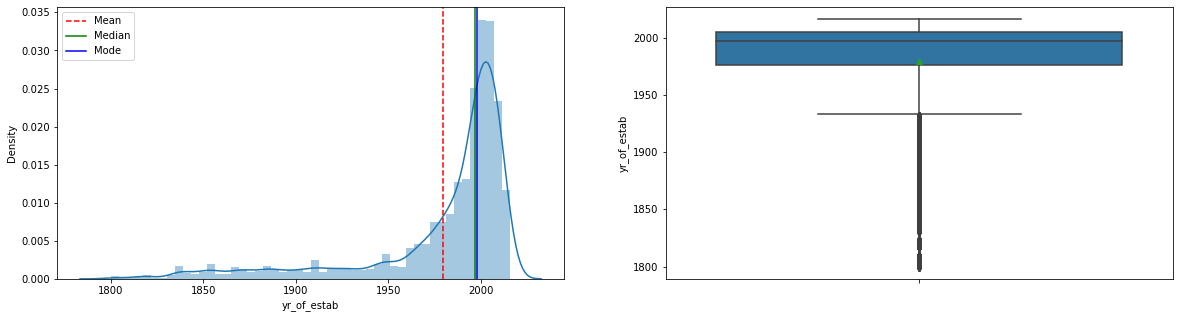

<IPython.core.display.Javascript object>

In [36]:
distribution_box_plot(df, "yr_of_estab", kde=True, mean=True, median=True, mode=True)

#### Observations
- The data is heavily left skewed. 
- Most of the companies established in the year 2000. 
- There are few companies that are more than 200 years old.

**`prevailing_wage`**

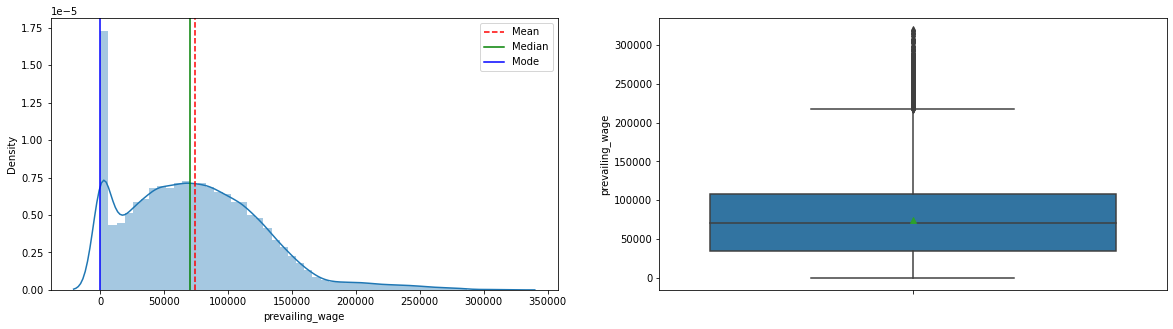

<IPython.core.display.Javascript object>

In [37]:
distribution_box_plot(
    df, "prevailing_wage", kde=True, mean=True, median=True, mode=True
)

#### Observations
- The data is heavily right skewed. 
- Most of the applications have prevailing wage between 50000 and 100000. 
- There are few applications where wages go upto 300000.

**`Categorical Variables`**

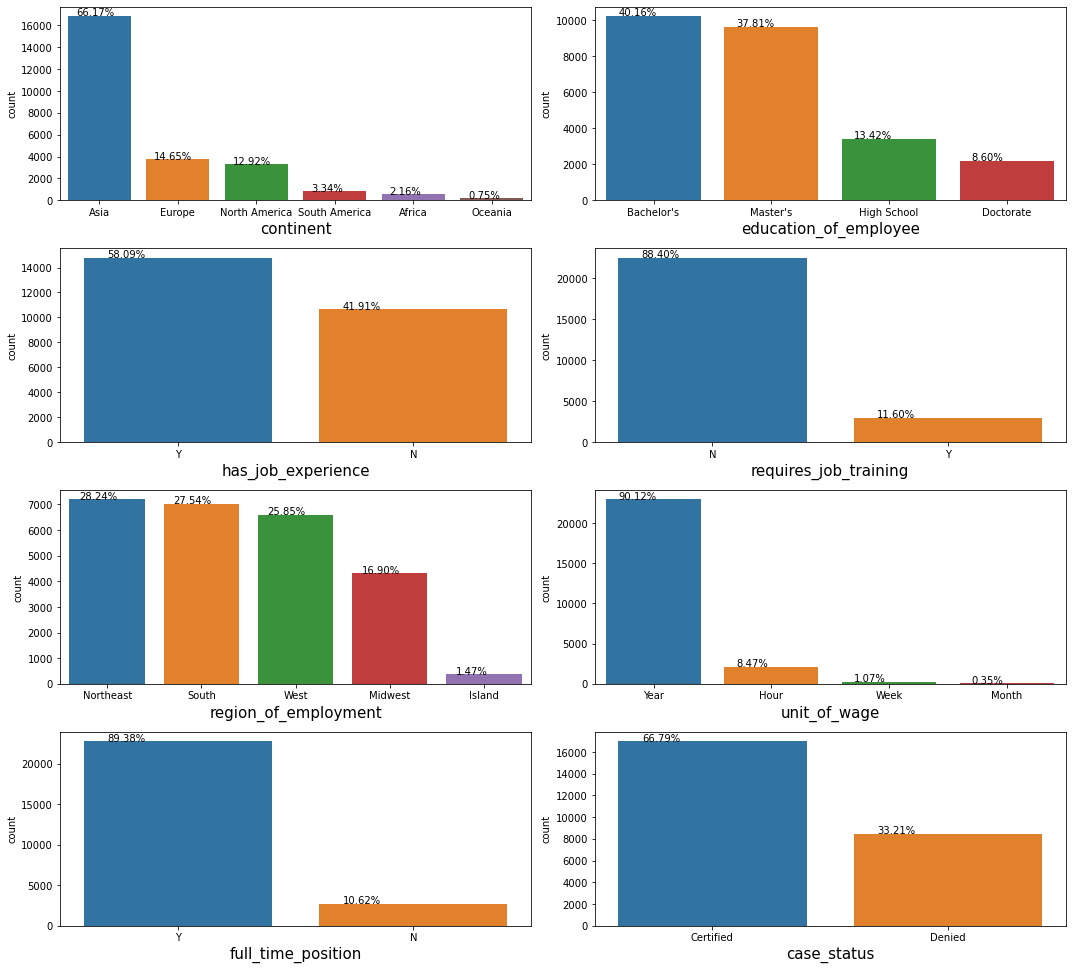

<IPython.core.display.Javascript object>

In [39]:
catcols = list(df.select_dtypes("category").columns)
plt.figure(figsize=(15, 50))

for i in range(len(catcols)):
    plt.subplot(15, 2, i + 1)
    ax = sns.countplot(
        data=df,
        x=catcols[i],
        order=df[catcols[i]].value_counts(ascending=False).index[:],
    )
    total = df[catcols[i]].count()
    for p, label in zip(
        ax.patches, 100 * df[catcols[i]].value_counts(ascending=False).values / total,
    ):
        ax.annotate("{:.2f}%".format(label), (p.get_x() + 0.100, p.get_height() + 4.5))

    plt.tight_layout()
    plt.xlabel(catcols[i], fontsize=15)

plt.show()

### Observations
- `continent` data suggests that most of the applications are from Asia.
- Majority applicants have Bachelor's or Master's `education`.
- Nearly half of the applicants have `job experience` and half don't.
- Almost 90% applicants do not require `job training`.
- Most of the employment opportunities are in Northeast, South and West `region` of US.
- The `unit of wage` for almost all applications are yearly. 
- Almost all opportunities are `full time`
- 67% cases within the dataset are `Certified`.

## Multivariate Analysis

In [60]:
def stacked_barchart(data, predictor, target):
    """
    Create a contingency table and plot a stacked bar chart between the two categorical variables

    data: dataframe
    predictor: independent variable
    target: dependent variable
    """
    crosstab = pd.crosstab(index=data[target], columns=data[predictor])
    print(crosstab)
    crosstab.plot(kind="bar", stacked=True, figsize=(data[predictor].nunique() + 5, 5))
    plt.show()

<IPython.core.display.Javascript object>

**Leading Questions**:
1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification? 

2. How does the visa status vary across different continents? 
 
3. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status? 
 
4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa? 
 
5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?

### 1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification?

education_of_employee  Bachelor's  Doctorate  High School  Master's
case_status                                                        
Certified                    6367       1912         1164      7575
Denied                       3867        280         2256      2059


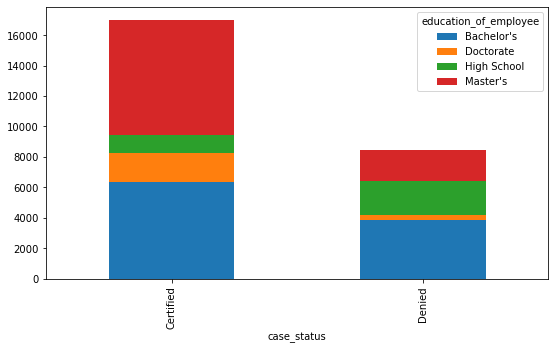

<IPython.core.display.Javascript object>

In [41]:
stacked_barchart(df, "education_of_employee", "case_status")

#### Observations
- Master's and Bachelor's degrees have high `Certified` rate over other qualifications.
- Applications with High School qualifications are mostly getting `Denied`.
- There are few applicants with doctorate qualification and almost all are Certified. 

### 2. How does the visa status vary across different continents?

continent    Africa   Asia  Europe  North America  Oceania  South America
case_status                                                              
Certified       397  11012    2957           2037      122            493
Denied          154   5849     775           1255       70            359


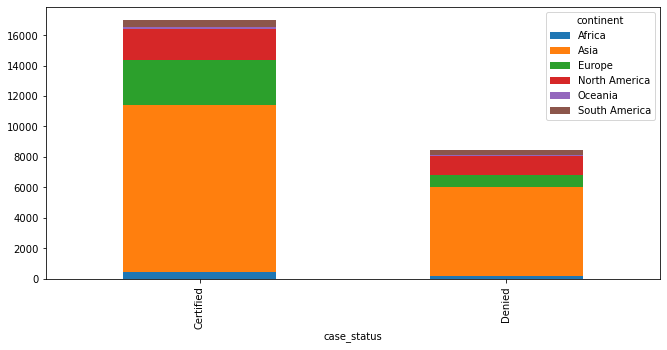

<IPython.core.display.Javascript object>

In [42]:
stacked_barchart(df, "continent", "case_status")

#### Observations
- Since there are more applications from Asia overall, the Certified to Denied ratio is higher for the rgion among others.
- There are more Certified applications than Denied from Europe region. 
- Africa, South America and Oceania have very few applications but the Denied rate is higher in South America. 

### 3. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status?

has_job_experience     N      Y
case_status                    
Certified           5994  11024
Denied              4684   3778


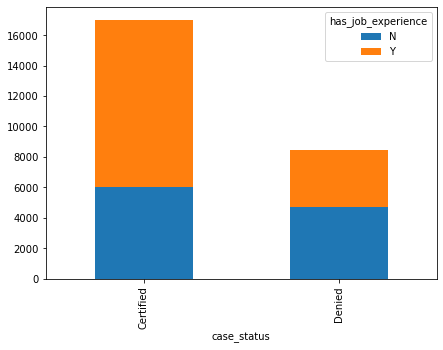

<IPython.core.display.Javascript object>

In [43]:
stacked_barchart(df, "has_job_experience", "case_status")

#### Observations
- The data tends to show that applicants with job experience have a higher chance of getting certified. There seem to be more applications without job experience in Denied category. 

### 4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa?

unit_of_wage  Hour  Month  Week   Year
case_status                           
Certified      747     55   169  16047
Denied        1410     34   103   6915


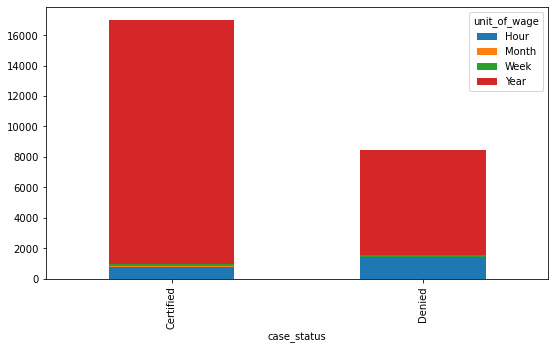

<IPython.core.display.Javascript object>

In [44]:
stacked_barchart(df, "unit_of_wage", "case_status")

#### Observations
Since majority applications have unit of wage as Year, it is the dominant unit of wage in both Certified and Denied category. Applications with hourly wages are more likely getting denied. There are not enough observations to conclude anything on Monthly and weekly wages.  

### 5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?

<AxesSubplot:xlabel='case_status', ylabel='prevailing_wage'>

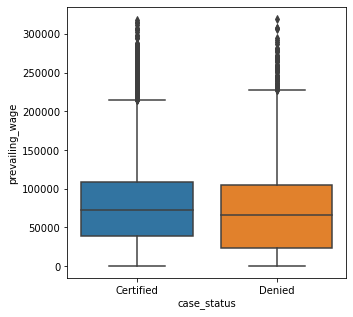

<IPython.core.display.Javascript object>

In [45]:
plt.figure(figsize=(5, 5))
sns.boxplot(data=df, y="prevailing_wage", x="case_status")

#### Observations
Case_status doesn't seem to vary much by prevailing wage. 

### 6. Region of employment Vs Case Status

region_of_employment  Island  Midwest  Northeast  South  West
case_status                                                  
Certified                226     3253       4526   4913  4100
Denied                   149     1054       2669   2104  2486


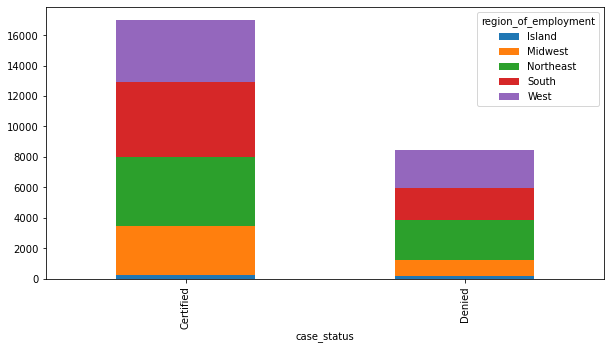

<IPython.core.display.Javascript object>

In [46]:
stacked_barchart(df, "region_of_employment", "case_status")

#### Observations
Certified to Denied ratio is very similar for all the regions. There seem to be slightly more rejections in Northeast. 

### 7. Let's analyse how prevailing wage varies across regions in the US and its impact on case status

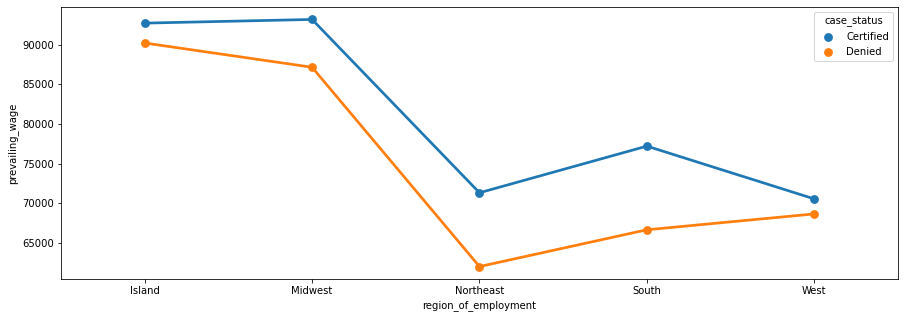

<IPython.core.display.Javascript object>

In [59]:
plt.figure(figsize=(15, 5))

ax = sns.pointplot(
    data=df,
    x="region_of_employment",
    y="prevailing_wage", 
    hue="case_status",
    kind="line",
    ci=None,
    sort=True,
)
plt.show()

#### Observations
The graph shows trend that higher prevailing wage are getting certified across all regions. It's not apparent that prevailing wage makes any difference to Certified status in West and Island. 

### 8. Let's analyse how prevailing wage varies by education across different region of US, and its impact on case status

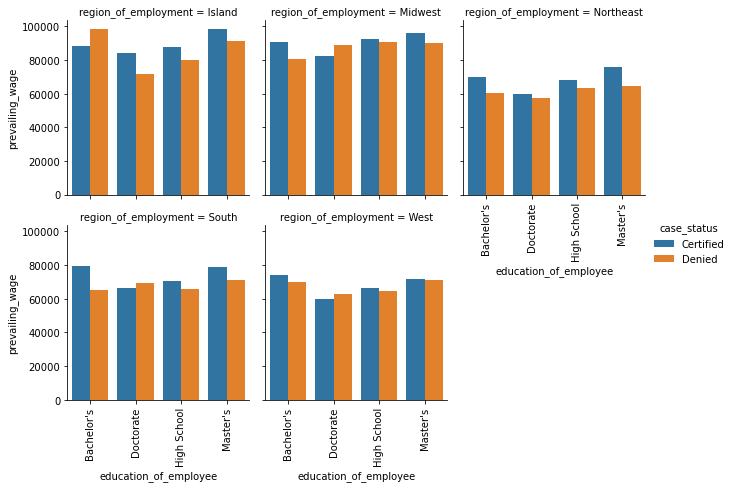

<IPython.core.display.Javascript object>

In [63]:
cplot1 = sns.catplot(
    x="education_of_employee",
    y="prevailing_wage",
    data=df,
    hue="case_status",
    col="region_of_employment",
    kind="bar",
    ci=None,
    height=3,
    col_wrap=3,
)
cplot1.set_xticklabels(rotation=90)  # set vertical orientation of x axes labels
plt.show()

#### Observations
- Applications with Bachelor's degree but higher wage are more denied than certified in Island. All other regions have more certified cases for higher wages than Denied. 
- Doctorate cases with high wage are more Denied in South, West and Midwest. There are more or equal Certified cases in other region.
- Masters have more or equal certification rate as Denied at different wage levels in all regions.
- High School qualification with higher wage seem to be getting certified in all regions. 

### 9. Let's analyse if no of employess have any impact on case status

<AxesSubplot:xlabel='case_status', ylabel='no_of_employees'>

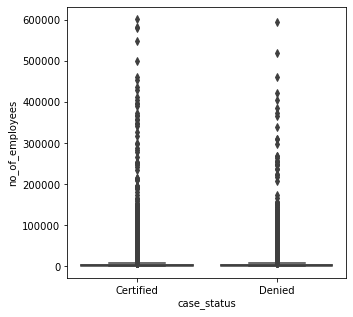

<IPython.core.display.Javascript object>

In [65]:
plt.figure(figsize=(5, 5))
sns.boxplot(data=df, y="no_of_employees", x="case_status")

#### Observations

Number of employees doesn't seem to affect case status. The values appear to be discreet.

### 10. Let's analyse if no of employess have any impact on case status

<AxesSubplot:xlabel='case_status', ylabel='yr_of_estab'>

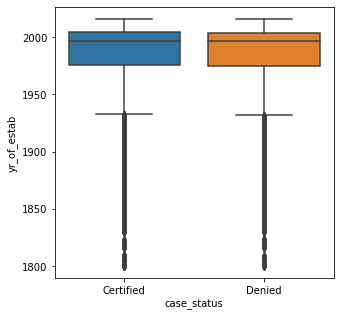

<IPython.core.display.Javascript object>

In [66]:
plt.figure(figsize=(5, 5))
sns.boxplot(data=df, y="yr_of_estab", x="case_status")

#### Observations

yr_of_estab doesn't seem to affect case status.

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering 
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

**Let's encode case_status Certified as 1 and Denied as 0**

In [67]:
df["case_status"] = df["case_status"].apply(lambda x: 1 if x == "Certified" else 0)

<IPython.core.display.Javascript object>

In [70]:
df.case_status.value_counts()

1    17018
0     8462
Name: case_status, dtype: int64

<IPython.core.display.Javascript object>

**Let's drop no_of_employees and yr_of_estab since both don't seem to affect case status as we saw in EDA above.**

In [71]:
df.drop("no_of_employees", axis=1, inplace=True)
df.drop("yr_of_estab", axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   continent              25480 non-null  category
 1   education_of_employee  25480 non-null  category
 2   has_job_experience     25480 non-null  category
 3   requires_job_training  25480 non-null  category
 4   region_of_employment   25480 non-null  category
 5   prevailing_wage        25480 non-null  float64 
 6   unit_of_wage           25480 non-null  category
 7   full_time_position     25480 non-null  category
 8   case_status            25480 non-null  category
dtypes: category(8), float64(1)
memory usage: 399.6 KB


<IPython.core.display.Javascript object>

**Outlier Treatment**

<AxesSubplot:ylabel='prevailing_wage'>

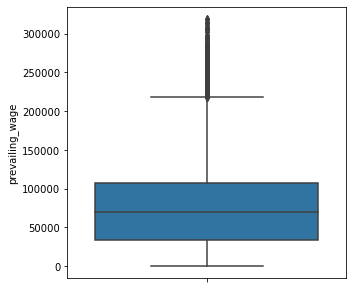

<IPython.core.display.Javascript object>

In [75]:
plt.figure(figsize=(5, 5))
sns.boxplot(data=df, y="prevailing_wage")

There are a few rows where prevailing wage is more than 200000. This could be valid data so let's keep them

### Data Preparation for modeling

- We want to predict which visa application will be certified.
- Before we proceed to build a model, we'll have to encode categorical features.
- We'll split the data into train and test to be able to evaluate the model that we build on the train data.

In [79]:
X = df.drop(["case_status"], axis=1)
Y = df["case_status"]

<IPython.core.display.Javascript object>

In [80]:
# creating dummies
X = pd.get_dummies(X)

X.head()

,prevailing_wage,continent_Africa,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America,education_of_employee_Bachelor's,education_of_employee_Doctorate,education_of_employee_High School,education_of_employee_Master's,has_job_experience_N,has_job_experience_Y,requires_job_training_N,requires_job_training_Y,region_of_employment_Island,region_of_employment_Midwest,region_of_employment_Northeast,region_of_employment_South,region_of_employment_West,unit_of_wage_Hour,unit_of_wage_Month,unit_of_wage_Week,unit_of_wage_Year,full_time_position_N,full_time_position_Y
0,592.2029,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,1
1,83425.6500,0,1,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,1,0,1
2,122996.8600,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1
3,83434.0300,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,1
4,149907.3900,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,1


<IPython.core.display.Javascript object>

In [81]:
# Splitting data in train and test sets
# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1, stratify=Y
)
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (17836, 26)
Shape of test set :  (7644, 26)
Percentage of classes in training set:
1    0.667919
0    0.332081
Name: case_status, dtype: float64
Percentage of classes in test set:
1    0.667844
0    0.332156
Name: case_status, dtype: float64


<IPython.core.display.Javascript object>

### Model evaluation criterion

### Model can make wrong predictions as:

1. Model predicts that the visa application will get certified but in reality, the visa application should get denied.
2. Model predicts that the visa application will not get certified but in reality, the visa application should get certified. 

### Which case is more important? 
* Both the cases are important as:

* If a visa is certified when it had to be denied a wrong employee will get the job position while US citizens will miss the opportunity to work on that position.

* If a visa is denied when it had to be certified the U.S. will lose a suitable human resource that can contribute to the economy. 



### How to reduce the losses?

* `F1 Score` can be used a the metric for evaluation of the model, greater the F1  score higher are the chances of minimizing False Negatives and False Positives. 
* We will use balanced class weights so that model focuses equally on both classes.

#### First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The model_performance_classification_sklearn function will be used to check the model performance of models. 
* The confusion_matrix_sklearn function will be used to plot the confusion matrix.

In [82]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [83]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

In [90]:
dtree = DecisionTreeClassifier(
    criterion="gini", class_weight="balanced", random_state=1
)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=1)

<IPython.core.display.Javascript object>

**Confusion matrix**

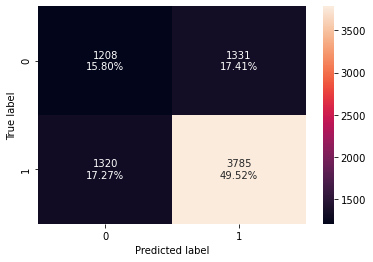

<IPython.core.display.Javascript object>

In [91]:
confusion_matrix_sklearn(dtree, X_test, y_test)

**Confusion Matrix -**

* Visa certified and the model predicted it correctly as Certified :  True Positive (observed=1,predicted=1)

* Visa Denied and the model predicted it as Certified : False Positive (observed=0,predicted=1)

* Visa Denied and the model predicted it as Denied  : True Negative (observed=0,predicted=0)

* Visa certified and the model predicted it as Denied : False Negative (observed=1,predicted=0)

**Model performance on training set**

In [92]:
dtree_model_train_perf = model_performance_classification_sklearn(
    dtree, X_train, y_train
)
print("Training performance \n", dtree_model_train_perf)

Training performance 
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


<IPython.core.display.Javascript object>

**Model performance on testing set**

In [124]:
dtree_model_test_perf = model_performance_classification_sklearn(dtree, X_test, y_test)
print("Testing performance \n", dtree_model_test_perf)

Testing performance 
    Accuracy   Recall  Precision        F1
0  0.653192  0.74143   0.739836  0.740632


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**The model suffers from overfitting since it is giving 100% accuracy , recall, precision and F1 on training set but underperforming on testing set**

### Reducing over fitting by pre-pruning using hyperparameters

In [97]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1, class_weight="balanced")

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(5, 16, 5),
    "min_samples_leaf": [3, 5, 7],
    "max_leaf_nodes": [2, 5],
    "min_impurity_decrease": [0.0001, 0.001],
}
# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(f1_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5, max_leaf_nodes=2,
                       min_impurity_decrease=0.0001, min_samples_leaf=3,
                       random_state=1)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Confusion matrix of the pruned tree on training data**

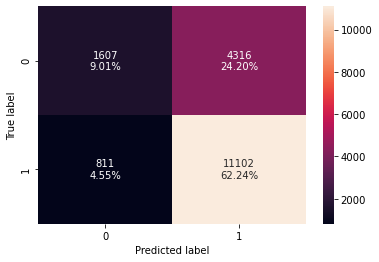

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [101]:
confusion_matrix_sklearn(estimator, X_train, y_train)

**Confusion matrix of the pruned tree on testing data**

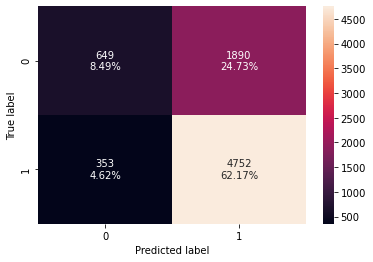

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [100]:
confusion_matrix_sklearn(estimator, X_test, y_test)

**Model performance on training set**

In [102]:
dtree_estimator_model_train_perf = model_performance_classification_sklearn(
    estimator, X_train, y_train
)
print("Training performance \n", dtree_estimator_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.712548  0.931923   0.720067  0.812411


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Model performance on testing set**

In [123]:
dtree_estimator_model_test_perf = model_performance_classification_sklearn(
    estimator, X_test, y_test
)
print("Testing performance \n", dtree_estimator_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.706567  0.930852   0.715447  0.809058


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**The model is now performing consistently across training and testing data. The scores are nearly same for both the sets. Test set scores for tuned tree are better than the scores of original tree**

## Building bagging and boosting models

### Bagging Classifier

In [104]:
bagging = BaggingClassifier(random_state=1)
bagging.fit(X_train, y_train)

BaggingClassifier(random_state=1)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

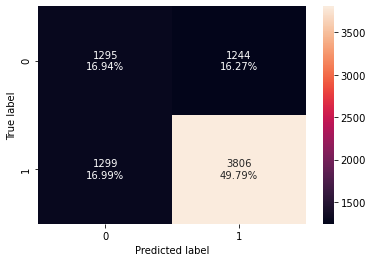

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [105]:
confusion_matrix_sklearn(bagging, X_test, y_test)

**Model performance on training set**

In [106]:
bagging_model_train_perf = model_performance_classification_sklearn(
    bagging, X_train, y_train
)
print("Training performance \n", bagging_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.974658  0.975069   0.986832  0.980915


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Model performance on testing set**

In [122]:
bagging_model_test_perf = model_performance_classification_sklearn(
    bagging, X_test, y_test
)
print("Testing performance \n", bagging_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.667321  0.745544   0.753663  0.749581


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**The bagging model suffers from overfitting since it is giving nearly 100% accuracy , recall, precision and F1 on training set but underperforming on testing set**

### Hyperparameter Tuning - Bagging

In [109]:
# grid search for bagging classifier
cl1 = DecisionTreeClassifier(random_state=1, class_weight="balanced")

parameters = {
    "max_samples": [0.7, 0.9],
    "max_features": [0.7, 0.9],
    "n_estimators": np.arange(90, 111, 10),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)


grid = GridSearchCV(BaggingClassifier(random_state=1,bootstrap=True), param_grid=parameters, scoring = acc_scorer, cv = 5)

grid.fit(X_train, y_train)
## getting the best estimator
bagging_estimator  = grid.best_estimator_
bagging_estimator.fit(X_train,y_train)


BaggingClassifier(max_features=0.7, max_samples=0.7, n_estimators=90,
                  random_state=1)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Confusion matrix of the tuned model on testing data**

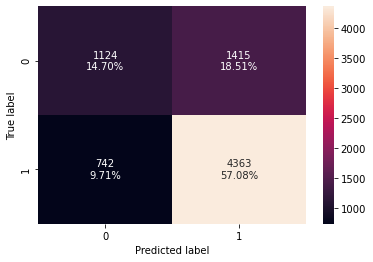

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [110]:
confusion_matrix_sklearn(bagging_estimator, X_test, y_test)

**Model performance on training set**

In [111]:
bagging_estimator_tuned_model_train_perf = model_performance_classification_sklearn(
    bagging_estimator, X_train, y_train
)
print("Training performance \n", bagging_estimator_tuned_model_train_perf)

Training performance 
    Accuracy    Recall  Precision       F1
0  0.941747  0.989507   0.928043  0.95779


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Model performance on testing set**

In [121]:
bagging_estimator_tuned_model_test_perf = model_performance_classification_sklearn(
    bagging_estimator, X_test, y_test
)
print("Testing performance \n", bagging_estimator_tuned_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.717818  0.854652   0.755106  0.801801


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Overfitting has slightly reduced but still F1 score is low on testing set**

### Random Forest

In [113]:
rf = RandomForestClassifier(random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

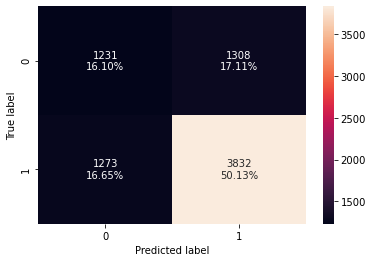

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [114]:
confusion_matrix_sklearn(rf, X_test, y_test)

In [115]:
rf_model_train_perf = model_performance_classification_sklearn(rf, X_train, y_train)
print("Training performance \n", rf_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.999776  0.999916   0.999748  0.999832


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [116]:
rf_model_test_perf = model_performance_classification_sklearn(rf, X_test, y_test)
print("Testing performance \n", rf_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0   0.66235  0.750637   0.745525  0.748072


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Random Forest is not able to generalize well on the test data**

### Hyperparameter Tuning - Random Forest

In [117]:
# Choose the type of classifier.
rf_estimator = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_depth": list(np.arange(5, 15, 5)),
    "max_features": ["sqrt", "log2"],
    "min_samples_split": [5, 7],
    "n_estimators": np.arange(15, 26, 5),
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(f1_score)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_estimator.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features='log2', min_samples_split=7,
                       n_estimators=25, random_state=1)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Confusion matrix of the tuned model on testing data**

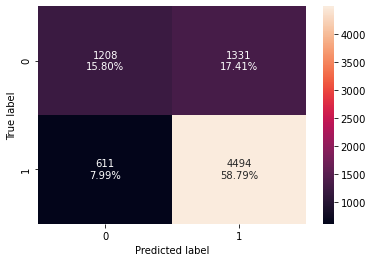

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [118]:
confusion_matrix_sklearn(rf_estimator, X_test, y_test)

**Model performance on training set**

In [119]:
rf_estimator_model_train_perf = model_performance_classification_sklearn(
    rf_estimator, X_train, y_train
)
print("Training performance \n", rf_estimator_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.766988  0.893058    0.78685  0.836597


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Model performance on testing set**

In [120]:
rf_estimator_model_test_perf = model_performance_classification_sklearn(
    rf_estimator, X_test, y_test
)
print("Testing performance \n", rf_estimator_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.745945  0.880313   0.771502  0.822324


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**The model is now performing consistently across training and testing data. The scores are nearly same for both the sets. Test set scores for tuned forest are better than the scores of original forest. F1 score has increased from 74% to 82%**

### Boosting

### AdaBoost Classifier

In [125]:
abc = AdaBoostClassifier(random_state=1)
abc.fit(X_train, y_train)

AdaBoostClassifier(random_state=1)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

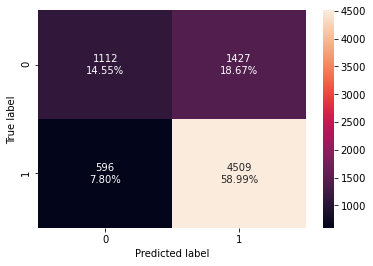

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [126]:
confusion_matrix_sklearn(abc, X_test, y_test)

**Model performance on training set**

In [127]:
ab_classifier_model_train_perf = model_performance_classification_sklearn(
    abc, X_train, y_train
)
print("Training performance \n", ab_classifier_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.738338  0.884748   0.761891  0.818736


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Model performance on testing set**

In [128]:
ab_classifier_model_test_perf = model_performance_classification_sklearn(
    abc, X_test, y_test
)
print("Testing performance \n", ab_classifier_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.735348  0.883252   0.759602  0.816774


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**The model is performing consistently across training and testing data. The scores are nearly same for both the sets. However, F1 score is slightly low. let's see if this can be improved using hyperparameter tuning**

### Hyperparameter Tuning - AdaBoost Classifier

In [129]:
# Choose the type of classifier.
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    # Let's try different max_depth for base_estimator
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, class_weight="balanced", random_state=1),
        DecisionTreeClassifier(max_depth=2, class_weight="balanced", random_state=1),
    ],
    "n_estimators": np.arange(80, 101, 10),
    "learning_rate": np.arange(0.1, 0.4, 0.1),
}

# Type of scoring used to compare parameter  combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)


# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                         max_depth=1,
                                                         random_state=1),
                   learning_rate=0.1, n_estimators=100, random_state=1)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

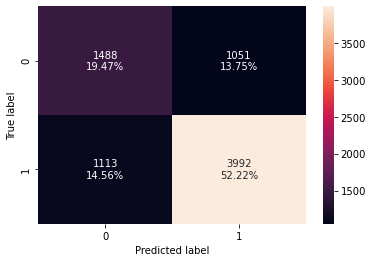

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [130]:
confusion_matrix_sklearn(abc_tuned, X_test, y_test)

**Model performance on training set**

In [131]:
abc_tuned_model_train_perf = model_performance_classification_sklearn(
    abc_tuned, X_train, y_train
)
print("Training performance \n", abc_tuned_model_train_perf)

Training performance 
    Accuracy    Recall  Precision       F1
0  0.719388  0.781835    0.79471  0.78822


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Model performance on testing set**

In [132]:
abc_tuned_model_test_perf = model_performance_classification_sklearn(
    abc_tuned, X_test, y_test
)
print("Testing performance \n", abc_tuned_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.716902  0.781978   0.791592  0.786756


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**The model is performing consistently across training and testing data. The scores are nearly same for both the sets. However, F1 score is slightly lower than the original adaboost model.**

### Gradient Boosting Classifier

In [133]:
gbc_init = GradientBoostingClassifier(
    init=AdaBoostClassifier(random_state=1), random_state=1
)
gbc_init.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           random_state=1)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

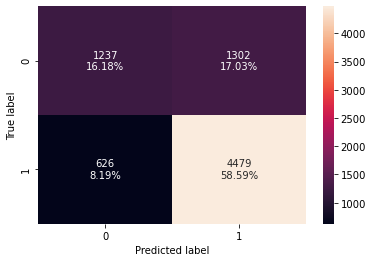

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [134]:
confusion_matrix_sklearn(gbc_init, X_test, y_test)

**Model performance on training set**

In [135]:
gbc_init_model_train_perf = model_performance_classification_sklearn(
    gbc_init, X_train, y_train
)
print("Training performance \n", gbc_init_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.755551  0.879459   0.781807  0.827763


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Model performance on testing set**

In [136]:
gbc_init_model_test_perf = model_performance_classification_sklearn(
    gbc_init, X_test, y_test
)
print("Testing performance \n", gbc_init_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.747776  0.877375   0.774779  0.822892


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**The model is performing consistently across training and testing data. The scores are nearly same for both the sets. F1 score is also higher than the adaboost model.**

### Hyperparameter Tuning - Gradient Boosting Classifier

In [137]:
# Choose the type of classifier.
gbc_tuned = GradientBoostingClassifier(
    init=AdaBoostClassifier(random_state=1), random_state=1
)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [200, 250],
    "subsample": [0.9, 1],
    "max_features": [0.8, 0.9],
    "learning_rate": np.arange(0.1, 0.21, 0.1),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.8, n_estimators=200, random_state=1,
                           subsample=1)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

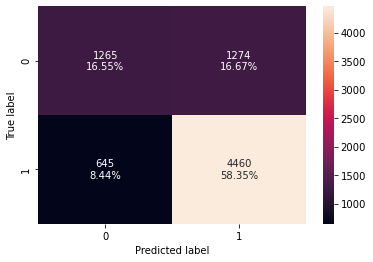

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [138]:
confusion_matrix_sklearn(gbc_tuned, X_test, y_test)

**Model performance on training set**

In [139]:
gbc_tuned_model_train_perf = model_performance_classification_sklearn(
    gbc_tuned, X_train, y_train
)
print("Training performance \n", gbc_tuned_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.761998  0.880551   0.788011  0.831715


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Model performance on testing set**

In [140]:
gbc_tuned_model_test_perf = model_performance_classification_sklearn(
    gbc_tuned, X_test, y_test
)
print("Testing performance \n", gbc_tuned_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.748953  0.873653   0.777817  0.822954


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**The model is performing consistently across training and testing data. The scores are nearly same for both the sets. F1 score is nearly same as the untuned gradient boosting classifier**

##  Will tuning the hyperparameters improve the model performance?

## Model Performance Comparison and Conclusions

## Actionable Insights and Recommendations